<a href="https://colab.research.google.com/github/HLaw18/4105/blob/main/HW4_4105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, Ridge

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Optimum number of principal components (K): 2


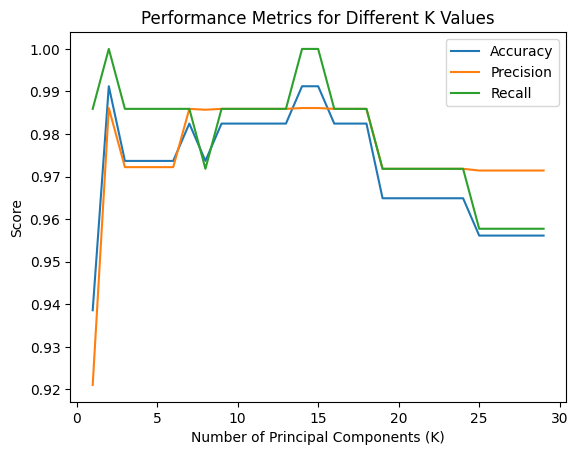

Accuracy of SVM with linear kernel: 0.956140350877193
Accuracy of SVM with polynomial kernel: 0.9473684210526315
Accuracy of SVM with radial basis function kernel: 0.9473684210526315


In [ ]:
#1
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/cancer.csv'
dataCancer = pd.DataFrame(pd.read_csv(file_path))

feature_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
target_col = 'diagnosis'

X = dataCancer[feature_cols]
y = dataCancer[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

K_values = np.arange(1, X.shape[1] + 1)
accuracy_scores = []

for K in K_values:
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    svm = SVC(kernel='linear')
    svm.fit(X_train_pca, y_train)

    y_pred = svm.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

optimal_K = K_values[np.argmax(accuracy_scores)]
print("Optimum number of principal components (K):", optimal_K)

precision_scores = []
recall_scores = []

for K in K_values:
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    svm = SVC(kernel='linear')
    svm.fit(X_train_pca, y_train)

    y_pred = svm.predict(X_test_pca)

    precision = precision_score(y_test, y_pred, pos_label='B')
    recall = recall_score(y_test, y_pred, pos_label='B')

    precision_scores.append(precision)
    recall_scores.append(recall)

plt.plot(K_values, accuracy_scores, label='Accuracy')
plt.plot(K_values, precision_scores, label='Precision')
plt.plot(K_values, recall_scores, label='Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Performance Metrics for Different K Values')
plt.legend()
plt.show()

kernel_names = ['linear', 'poly', 'rbf']
svm_accuracies = []

for kernel in kernel_names:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    svm_accuracies.append(accuracy)

print("Accuracy of SVM with linear kernel:", svm_accuracies[0])
print("Accuracy of SVM with polynomial kernel:", svm_accuracies[1])
print("Accuracy of SVM with radial basis function kernel:", svm_accuracies[2])

MSE for SVR with 1 components: 0.5990742124219808
MSE for SVR with 2 components: 0.5954319864869054
MSE for SVR with 3 components: 0.5891841981722956
MSE for SVR with 4 components: 0.5816444421696635
MSE for SVR with 5 components: 0.5836667875042784
MSE for SVR with 6 components: 0.5800643226789701
MSE for SVR with 7 components: 0.574830837643751
MSE for SVR with 8 components: 0.5675762307683686
MSE for SVR with 9 components: 0.5746291796264801
MSE for SVR with 10 components: 0.576633075029672
MSE for SVR with 11 components: 0.5521983650056846


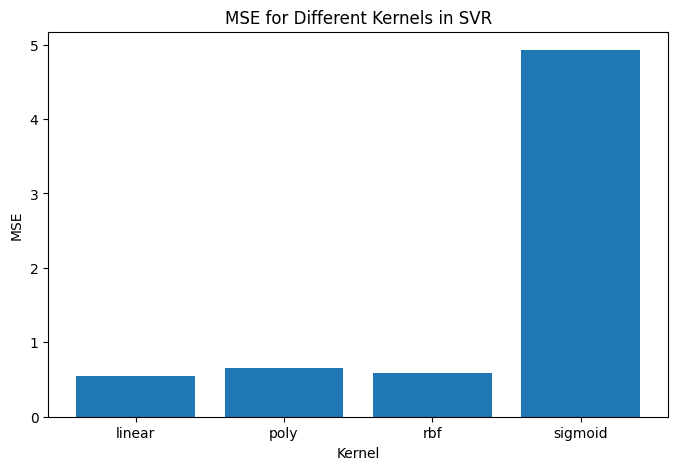

In [112]:
#2
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/Housing.csv'
dataHousing = pd.DataFrame(pd.read_csv(file_path))

varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

def binary_map(x):
  return x.map({'yes':1,"no":0})

dataHousing[varlist] = dataHousing[varlist].apply(binary_map)

varlist2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

dataHousing = dataHousing[varlist2]

Y = dataHousing.pop('price')
X = dataHousing

scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = Y.values.reshape(-1, 1)
Y = scaler.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

y_train = pd.Series(y_train.flatten()).fillna(pd.Series(y_train.flatten()).mean())

k_values = range(1, 12)
mse_values = []

for k in k_values:
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    svr = SVR(kernel='linear')
    svr.fit(X_train_pca, y_train)
    y_pred = svr.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    print(f"MSE for SVR with {k} components: {mse}")

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mse_kernels = []

for kernel in kernels:
    svm = SVR(kernel=kernel)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_kernels.append(mse)

plt.figure(figsize=(8, 5))
plt.bar(kernels, mse_kernels)
plt.title('MSE for Different Kernels in SVR')
plt.xlabel('Kernel')
plt.ylabel('MSE')
plt.show()


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"MSE for Ridge Regression: {mse_ridge}")

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"MSE for SVR: {mse_svr}")

MSE for Ridge Regression: 0.5158204444104976
MSE for SVR: 0.5522942925234355


Best kernel: linear
Mean Squared Error: 5565648082359.89


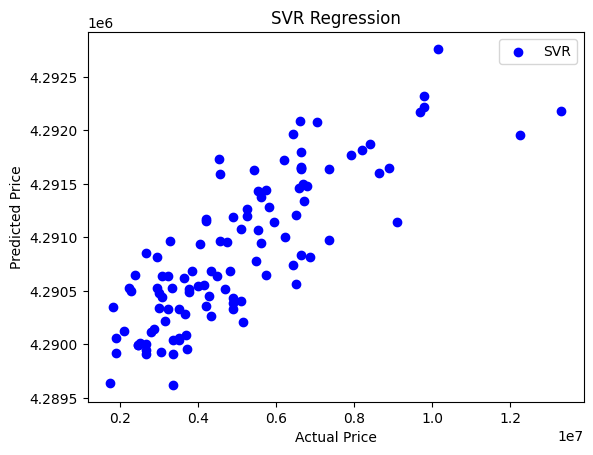

Optimal number of principal components: 10


In [108]:
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/Housing.csv'
dataHousing = pd.DataFrame(pd.read_csv(file_path))

varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

def binary_map(x):
  return x.map({'yes':1,"no":0})

dataHousing[varlist] = dataHousing[varlist].apply(binary_map)

X = dataHousing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = dataHousing['price']

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_kernel = None
best_score = float('inf')

for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled, y_train)
    y_pred = svr.predict(X_eval_scaled)
    mse = mean_squared_error(y_eval, y_pred)
    if mse < best_score:
        best_score = mse
        best_kernel = kernel

print(f"Best kernel: {best_kernel}")
print(f"Mean Squared Error: {best_score}")

svr = SVR(kernel=best_kernel)
svr.fit(X_train_scaled, y_train)

plt.scatter(y_eval, svr.predict(X_eval_scaled), c='b', label='SVR')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("SVR Regression")
plt.legend()
plt.show()

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Optimal number of principal components: {optimal_components}")